In [ ]:
from IPython.display import HTML; HTML(f"""<style>{open("./styles/styles.css").read()}</style>""")

<center>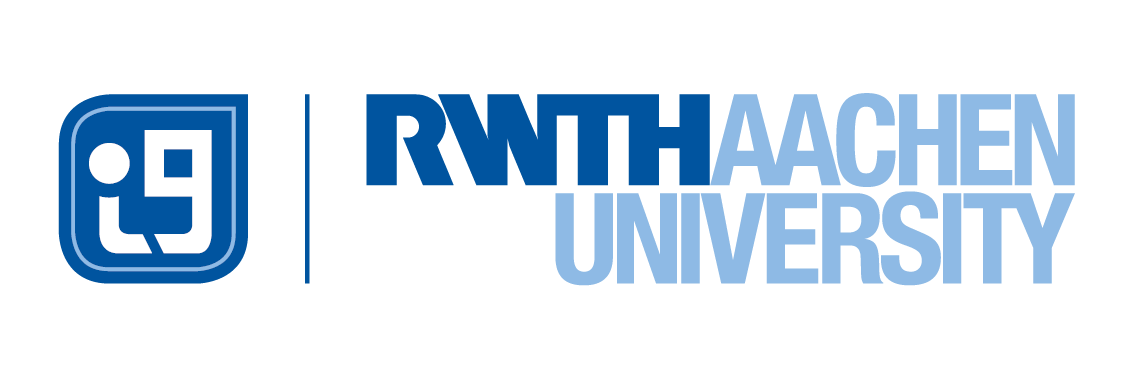</center>

<a name="top"></a>
# Matplotlib
## Overview
* [Introduction to Matplotlib](#intro)
    * [Installation](#installation)
    * [Importing Matplotlib](#import)
    * [Yout first plot](#plot)
* [Customizing Plots](#customizing)
* [Figures and Axes](#figures)
* [Scatter Plots](#scatter)
* [Box Plots](#boxplots)
* [Histograms](#histograms)
* [Image Visualization](#image)

<a name="intro"></a>
## Introduction to Matplotlib

Matplotlib is a very useful package to visualize data. In this Chapter we are especially talking about the module `matplotlib.pyplot` to create different kinds of plots.

<a name="installation"></a>
### Installation

If you are using our Jupyter profile, Matplotlib is already installed and you can import and use it it right away. If you are using your own local installation you can install Matplotlib as follows:

#### Anaconda 
Anaconda already comes with Matplotlib, that's why you normally do not have to install it again. But if you want/have to install it manually you can do so by typing the following into the conda-prompt:

```console
conda install matplotlib
```

#### pip
To install Matplotlib with pip, type the following into your terminal: 

```console
pip install matplotlib
```
This command installs Matplotlib in the current working Python environment.

<a name="import"></a>
### Import Matplotlib
When you have succesfully installed Matplotlib you have to import it to use it. We are only using `matplotlib.pyplot`, so we will only import this submodule. Excecute the following code-cell, otherwise the all other cells in this Notebook will not work!

In [ ]:
from matplotlib import pyplot as plt

<a name="plot"></a>
### Your first plot

We now want to plot some data. For this we use the data stored in a python list, but it could be stored in an array as well. Internally any sequence given as data will be converted to a `numpy.ndarray` first:

In [ ]:
data = [1,2,3,4,5,6]

plt.plot(data)
plt.show()

With `pyplot.plot` we create a new plot. When we only give a one-dimensional sequence as an input, it will be interpreted as y-values, while the indices form the x-value. If we give two sequences as input we can plot them against each other.

In [ ]:
x = [1,2,3,4,5,6]
y = [1,3,2,4,6,5]

plt.plot(x,y)
plt.show()

We are not restricted to only numerical data. With `strings` as an input we can also visualize categorical data in the same way: 

In [ ]:
country = ["Germany","Netherlands","Belgium","France","Spain"]
population_in_millions = [83.2,17.53,11.59,67.75,47.42]

plt.plot(country,population_in_millions)
plt.show()

We will have a closer look at how this plotting works in detail in the section [Figures and Axes](#figures) where we explain what is actually happening when we type `plt.plot()`. But for now lets take our population data and change the way we visualize it. 

<a name="customizing"></a>
## Customizing Plots

The first things we want to add are a title and lables on the axes.

In [ ]:
plt.plot(country,population_in_millions)
plt.title("Population of selected European States")
plt.ylabel("Population in Mio.")
# plt.xlabel("-----  STATE  -----") - deemed unecessary
plt.show()

Then we want to change the way the graph is drawn. At the moment we have the default linegraph. One way to customize this line is via optional keyword-arguments. You can find a list of the possible arguments in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). For example we can change the linewidth:

In [ ]:
plt.plot(country,population_in_millions,linewidth=10)
plt.title("Population of selected European States")
plt.ylabel("Population in Mio.")
# plt.xlabel("-----  STATE  -----") - deemed unecessary
plt.show()

Another way of formatting the graph is via the argument `fmt` which is a string to format the style of the graph. It consits of a character for the marker, one or two characters for the line and a character for the color. For example `"--"` represents a dashed line and `"r"` stands for the color red. Again you can find all the possible format strings in the [documenntation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

In [ ]:
plt.plot(country,population_in_millions,"r--", linewidth=3)
plt.title("Population of selected European States")
plt.ylabel("Population in Mio.")
# plt.xlabel("-----  STATE  -----") - deemed unecessary
plt.show()

In [ ]:
plt.plot(country,population_in_millions,"g--o")
plt.title("Population of selected European States")
plt.ylabel("Population in Mio.")
# plt.xlabel("-----  STATE  -----") - deemed unecessary
plt.show()

<div class="learnmore"><b>Read more:</b> There many more options to customize a plot. You can find them in the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">documentation</a>.</div>

<a name="figures"></a>
## Figures and Axes

Now we want to dive a bit more into detail and understand what is happening and how to control the result that we get. First, we have to understand the anatomy of our plots:

Our data is drawn into a `figure` (a window, Jupyter Widget, etc.) which forms the most outer part of our plot. In this figure we have one or more `axes`. An `axes`-Object contains the region to plot our data, including the title, lables and usually two (or three) `Axis`-Objects (be aware of the difference between `Axes` and `Axis`. An `Axes` is the area where we plot our data, an `Axis` sets the scale of one data-variable.)

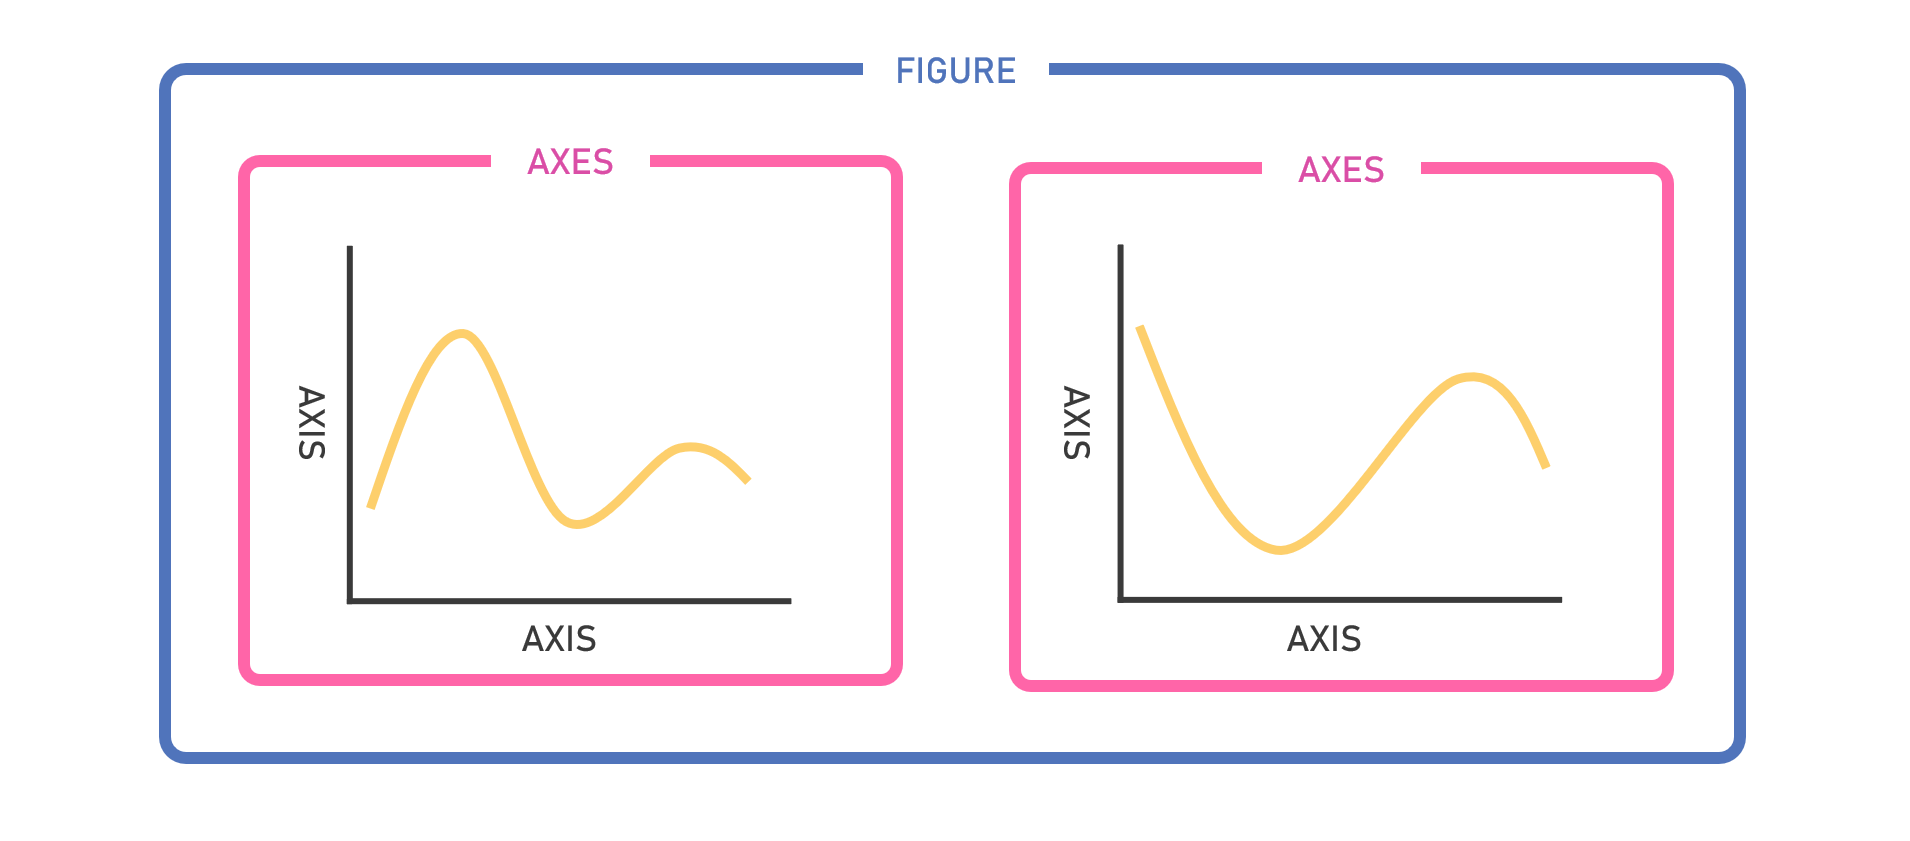

To create a new figure we can use the function `pyplot.figure`. On this figure we then call the function `Figure.subplots` to create new `Axes`-Objects inside of this figure. Then we can plot our data on this `Axes`-Object:

In [ ]:
fig = plt.figure()
ax = fig.subplots()
ax.plot([1,2,3,4])

plt.show()

But we have already achieved this result in the beginning without thinking about figures and axes by simply using `plt.plot`. The reason that this worked is, that pyplot can take care of your figures and axes for you. If you do not specify them explictly pyplot creates them for you or uses the current figure and axes. We call this the **implicit interface**. This may be very convinient for small interactive graphs but if you want to go back to an older plot, or work with several figures containing several axes at the same time, the implicit way can become very confusing. That is why we recommend to use the **explicit interface**, always explictly working on your axes and figures. With this you get easier control over your plots and can create more complex ones:

Above we have used the function `Figure.subplots` to create a new axes in our figure. We can specify a grid of several axes be giving the number of rows and columns as an argument to this function:

In [ ]:
fig = plt.figure()
axs = fig.subplots(2,3)

plt.show()

Then it does not return one axes but an array of axes, so that we can access each one with an index:

In [ ]:
fig = plt.figure()
axs = fig.subplots(2,3)
axs[0,1].plot([1,2,3,4])
axs[1,0].plot([3,2,3,4])
axs[1,2].plot([0.3,1.2,0.7,0.9])

plt.show()

You can also add the axes one by one with the function `Figure.add_subplot`. A three digit integer as an argument indicates the grid shape onto which the axes should be added and the position in this grid counting from 1. You must take care yourself, that the axes do not overlap (the last one plotted overrides prvious):

In [ ]:
fig = plt.figure()
# non-overlapping axes:
ax1 = fig.add_subplot(231) # 2 x 3 grid, 1. position
ax2 = fig.add_subplot(212) # 2 x 1 grid, 2. position => whole row
ax3 = fig.add_subplot(422) # 4 x 2 grid, 2. position

ax1.plot([1,2,3,4])
ax2.plot([1,2,3,4,3,2,1])
ax3.plot([3,2,3,4])
plt.show()

You can also specify ranges within the common grid (2 x 3):

In [ ]:
plt.subplot(2,3,1)        # 2 x 3 grid, position 1
plt.plot([1,2,3,4])

plt.subplot(2,3,(4,6))    # specify range: occupying postions 4 .. 6
plt.plot([1,2,3,4,3,2,1])

plt.subplot(2,3,(2,3))    # specify range: occupying postions 2 .. 3
plt.plot([3,2,3,4])

plt.show()

In [ ]:
plt.subplot(2,3,1)        # 2 x 3 grid, position 1
plt.plot([1,2,3,4])

plt.subplot(2,3,(4,6))    # specify range: occupying postions 4 .. 6
plt.plot([1,2,3,4,3,2,1])

plt.subplot(2,3,(1,2))    # specify range: occupying postions 1 .. 3
plt.plot([3,2,3,4])

plt.show()

<a name="scatter"></a>
## Scatter Plots

Now that we understand how plotting works with Matplotlib, we want to have a look at different plots, which are available. For this, we use NumPy to generate random data to plot. The first plot type we will cover is the scatter plot. It requires two one-dimensional arrays (or array-like objects) of the same length, one for the x and one for the y coordinate. Each point will be plotted as a dot:   

In [ ]:
import numpy as np

# Generating random data
np.random.seed(546)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

# plotting with pyplot
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y)
plt.show()

Or using the implicit interface:

In [ ]:
# plotting with plt
plt.scatter(x, y)
plt.show()

Now we want to customize this plot. With the argument `s`, we can specify the size of the dots with a float. If we want to give every dot a special size, we can also give an array as the argument `s`:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

size  = (np.random.rand(N)*10)**3   # note: vectorization is used here

ax.scatter(x, y, s=size)
plt.show()

To better visualize the overlapping areas, we can set the opacity of the dots with the argument `alpha`:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

size  = (np.random.rand(N)*10)**3   # note: vectorization is used here

ax.scatter(x, y, s=size, alpha=0.5)
plt.show()

We can also change the color of the dots with the argument `c`, where we give an array of colors. There are different ways you can specify those colors. One is to simply give numerical values for each data point. Those values are then mapped to colors, by a special function. If you want to specify this mapping you can use the `cmap` argument (see: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)), otherwise a default mapping is used:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

size  = (np.random.rand(N)*10)**3 
colors = np.random.rand(N)*10

ax.scatter(x, y, s=size, c=colors, alpha=0.5)
plt.show()

You can also specify the colors via RGB(A). For this you use a 2D-array (or array-like object), where each row (second dimension) contains the RGB(A) values for one point:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

size  = (np.random.rand(N)*10)**3 
red = np.random.rand(N)
green = np.random.rand(N)
blue = np.random.rand(N)

colorsAsRGB = np.array([red, green, blue]).transpose()   #  N x 3 shape

ax.scatter(x, y, s=size, c=colorsAsRGB, alpha=0.5)
plt.show()

The last thing we change are the markers. You can change them by giving a string representing a different type of marker as the `marker` argument. (You can find the available markers in the [documentation](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

size  = (np.random.rand(N)*10)**3 
red = np.random.rand(N)
green = np.random.rand(N)
blue = np.random.rand(N)

colorsAsRGB = np.array([red, green, blue]).transpose()

ax.scatter(x, y, s=size, c=colorsAsRGB, alpha=0.5, marker="d")  # try 'o', '+', ...
plt.show()

<a name="boxplots"></a>
## Box Plots

Another type of a plot is the Box Plot. It is used to display numerical data by showing its quantiles. The parts of a boxplot are shown in the image below:

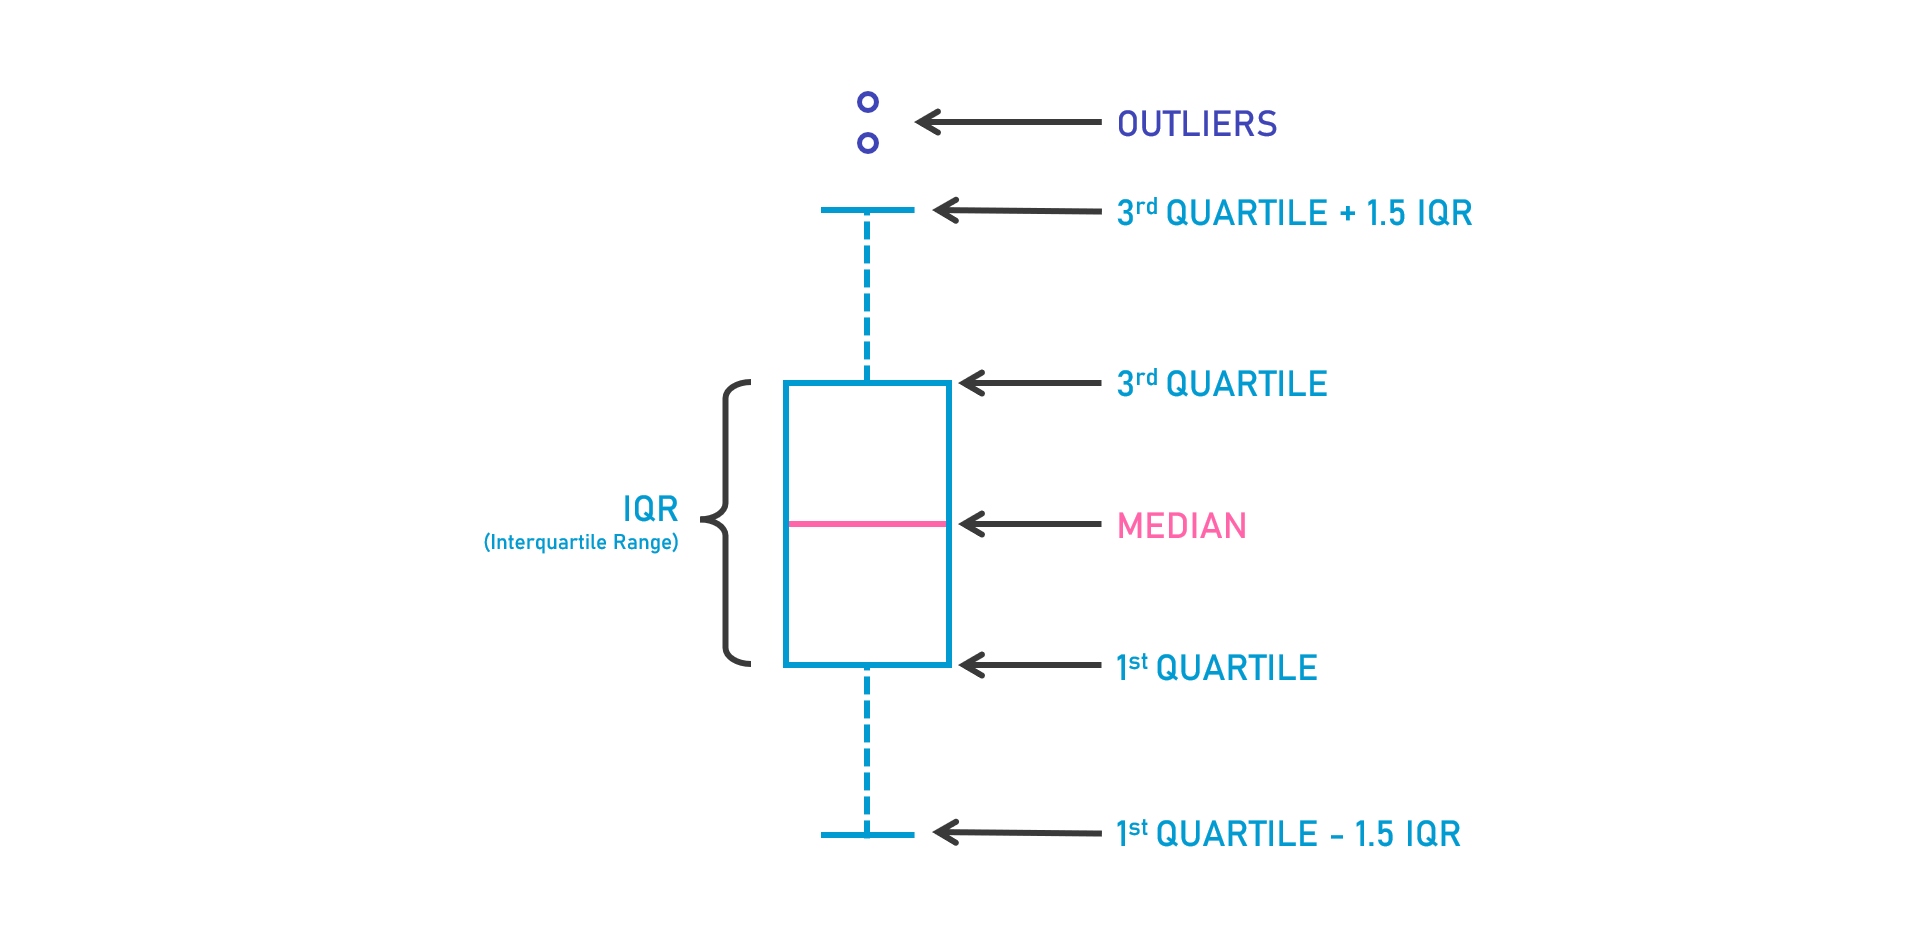

To create such a plot with Matplotlib we can use the function `pyplot.boxplot`:

In [ ]:
data = np.arange(1,10)

fig = plt.figure()
ax = fig.subplots()

ax.boxplot(data)
ax.set_yticks(range(0,11))

plt.show()

If we add some outliers to the data we can see that pyplot will display them properly:

In [ ]:
dataWithOutliers = np.append(data, 15)

fig = plt.figure()
ax = fig.subplots()

ax.boxplot(dataWithOutliers)

plt.show()

If we do not want them to be plotted at all, we can set the argument `showfliers` to `False`:

In [ ]:
fig = plt.figure()
ax = fig.subplots()

ax.boxplot(dataWithOutliers, showfliers=False)

plt.show()

If you give a 2D-array or sequence as data input, each sub-sequence will be plotted in a seperate Box Plot:

In [ ]:
np.random.seed(546)
data1 = np.arange(1,10)
data2 = np.random.rand(20)*10 + 10
multiData = [data1, data2]

fig = plt.figure()
ax = fig.subplots()

ax.boxplot(multiData)
ax.set_yticks(range(0,21))

plt.show()

Bix plots also come with a lot of arguments you can use to customize the plot. For example you can set the argument `showmeans` to `True` to also plot the arithmetic mean:

In [ ]:
fig = plt.figure()
ax = fig.subplots()

ax.boxplot(multiData, showmeans=True)

plt.show()

We can also give labels for each dataset which is plotted:

In [ ]:
labels = ["dataset1", "dataset2"]

fig = plt.figure()
ax = fig.subplots()

ax.boxplot(multiData, showmeans=True, labels=labels)

plt.show()

<div class="learnmore"><b>Learn more:</b> See the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html">documentation</a> for more customization options.</div>

<a name="histograms"></a>
## Histograms

We can use the function `pyplot.hist` to show the distribution of a variable in a histogram. It takes the data and groups it to so called bins, where a bin is defined by a lower and upper bound. For each bin a bar shows how many datapoints are inside this bin:

In [ ]:
import numpy as np
normal_data = np.random.randn(10000)

fig = plt.figure()
ax = fig.subplots()

ax.hist(normal_data)

plt.show()

To change the amount of bins we can use the argument `bins`. If we pass an integer, there will be `bins` many bins of equal width:

In [ ]:
import numpy as np
normal_data = np.random.randn(10000)

fig = plt.figure()
ax = fig.subplots()

ax.hist(normal_data, bins=25)

plt.show()

We can also pass a sequence to `bins`. Then it defines the bin edges, including the left edge of the first bin and the right edge of the last bin, which may lead to unequally spaced bins. All bins but the last one are half-open:

In [ ]:
import numpy as np
normal_data = np.random.randn(10000)

fig = plt.figure()
ax = fig.subplots()

ax.hist(normal_data, bins=[-3,-1.5,-0.75,0,0.5,1,2,4])

plt.show()

If we set the argument `density` to `True`, the bars do not show the amount of instances in a bin, but the bin's raw count divided by the total number of counts, which creates a probability density:

In [ ]:
import numpy as np
normal_data = np.random.randn(10000)

fig = plt.figure()
ax = fig.subplots()

ax.hist(normal_data, bins=80, density=True)

plt.show()

We can also plot multple datasets as one, by giving them as a nested sequence/array:

In [ ]:
import numpy as np
normal_data = np.random.randn(10000)
equal_data = np.random.randint(-4,4, (10000,))

x = [normal_data, equal_data]

fig = plt.figure()
ax = fig.subplots()

ax.hist(x)

plt.show()

With the argument `color` we can change the color of the bars. For multiple data, we give a sequence of colors: 

In [ ]:
import numpy as np
normal_data = np.random.randn(10000)
equal_data = np.random.randint(-4,4, (10000,))

x = [normal_data, equal_data]

fig = plt.figure()
ax = fig.subplots()

ax.hist(x, color=["cornflowerblue", "darkorchid"])

plt.show()

<div class="learnmore"><b>Learn more:</b> See the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">documentation</a> for more customization options.</div>

There are much more diagrams available, which you can [explore](https://matplotlib.org/stable/plot_types/index.html). For example take a look at the 2d-Histogram which visualizes the distirbution of two variables. Here we show some example data which simulates the distribution of the weight and the height of newborns:

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

height, weight = np.loadtxt("data/newborns.csv", delimiter=",")

plt.hist2d(height, weight, bins=30, norm=LogNorm(), cmap="plasma", )
plt.xlabel("Height [cm]")
plt.ylabel("Weight [kg]")
plt.title("Height and Weight Distribution of Newborns")
plt.colorbar()
plt.show()

<a name="image"></a>
## Image Visualization

Matplotlib can also be used to visualize data as images. For this we use the function `pyplot.imshow`:

In [ ]:
import numpy as np

# create a sequence with the shape (5x7)
image_data = []
for i in range(5):
    image_data.append(np.random.randn(7))

# plot this data as image
fig = plt.figure()
ax = fig.subplots()

ax.imshow(image_data)

plt.show()

In [ ]:
import numpy as np

# create a sequence with the shape (100x120)
image_data = []
for i in range(100):
    image_data.append(np.random.randn(120))

# plot this data as image
fig = plt.figure()
ax = fig.subplots()

ax.imshow(image_data)

plt.show()

As you can see, we pass an array/sequence as input with the shape (100, 120). If `imshow` gets data in this form (i.e. of shape (M, N)), each element of the array will be interpreted as a pixel, resulting in an image with dimension M x N. The mapping of a pixel to a color is again done by a colormap (and a normalization) function. You can find many available colormaps in the [documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [ ]:
import numpy as np
from matplotlib.colors import PowerNorm

# create some data to plot:
x = y = np.arange(-3.0, 3.0, 0.01)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2)

fig = plt.figure()
ax = fig.subplots()

# use the "rainbow" colormap and the "PowerNorm" to visualize the data
ax.imshow(Z, cmap="rainbow", norm=PowerNorm(1.9))

plt.show()

If you provide data in with the shape (M, N, 3), it is assumed that the three values of the last dimension represent an RGB value. With the shape (M, N, 4) you get an image with RGBA values. Have a look at the shape of `data` after the generation and try to understand how the image is created with RGB values:

In [ ]:
import numpy as np

dim = 50
data = []
for i in range(dim):
    r = np.linspace(50, 200, dim, dtype=np.int_)
    g = np.linspace(100, 255, dim, dtype=np.int_)
    b = np.linspace(100, 150, dim, dtype=np.int_)
    
    data.append(np.stack((r, g, b)).transpose())

fig = plt.figure()
ax = fig.subplots()

ax.imshow(data)

plt.show()

Up to now we created the data to plot artificially with NumPy. Another way to create the data is the function `pyplot.imread`, which reads an image and converts it to an array in the specific format. Then you can plot this data again:

In [ ]:
image = plt.imread("./data/Meme.jpg")

fig = plt.figure()
ax = fig.subplots()

ax.imshow(image)

plt.show()

## Summary

Within this lecture you have made your first experiences with Matplotlib. This includes in particular:

* The basics of plotting data with `pyplot.plot`
* Customizing plots with Matplotlib's extensive customization options
* Understanding the anatomy of a figure
* Different kinds of plots like:
    * Scatter Plots
    * Box Plots
    * Histograms
* Image Visualization